In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('full_data.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.shape

(4981, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Exploratory Data Analysis

#### 1. Count of each categories in a feature

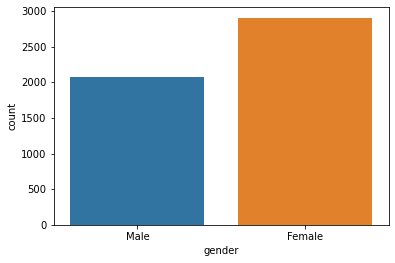

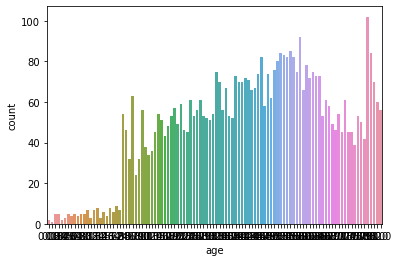

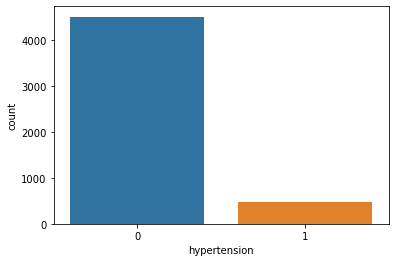

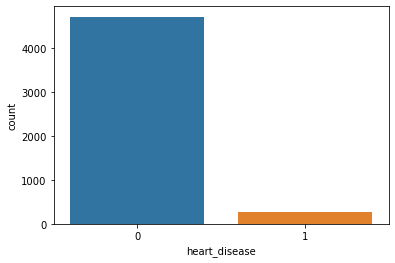

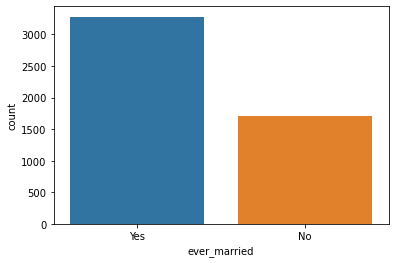

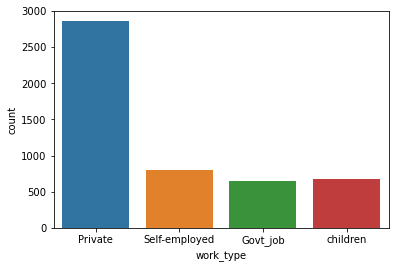

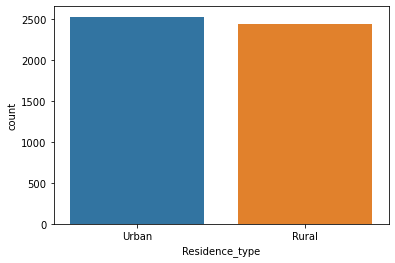

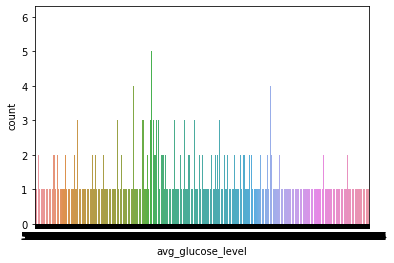

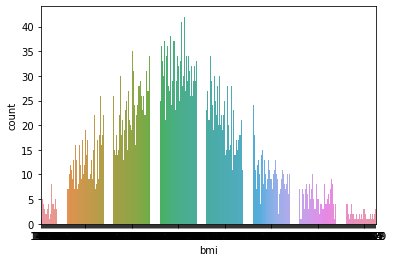

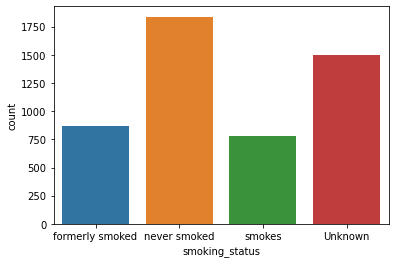

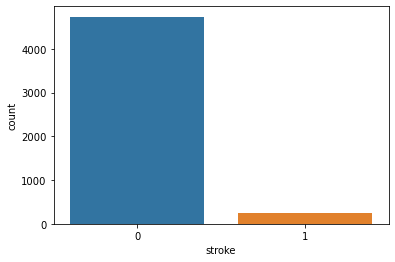

In [8]:
c = 0
for col in df.columns:
    plt.figure(c)
    c+=1
    plot = sns.countplot(x = col , data = df)

#### 2. Plotting the hypertension with respect to gender and work_type

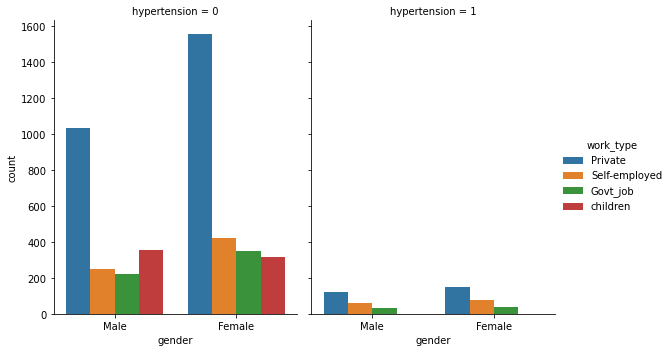

In [9]:
count_cat = sns.catplot(x="gender", hue="work_type", col="hypertension",
                data= df, kind="count",
                height= 5, aspect=.8);

#### 3. Plotting the stroke with respect to work_type and smoking_status

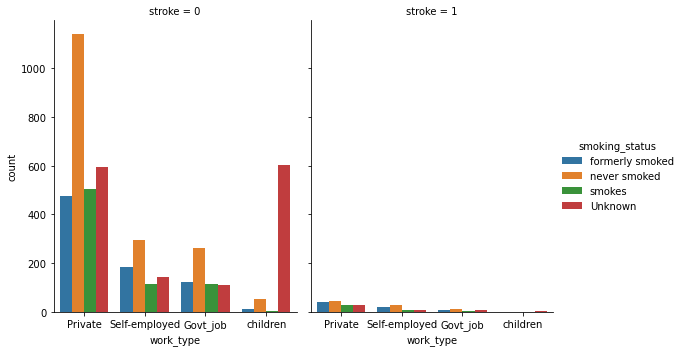

In [10]:
count_cat = sns.catplot(x = 'work_type', hue = 'smoking_status', col = 'stroke',
                data= df, kind="count",
                height= 5, aspect=.8);

#### 4. Violin plots to understand the effect of continous variable on Stroke

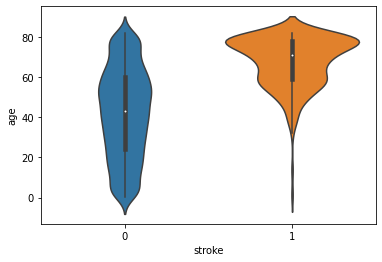

In [11]:
age_stroke = sns.violinplot(x = 'stroke', y = 'age', data = df)

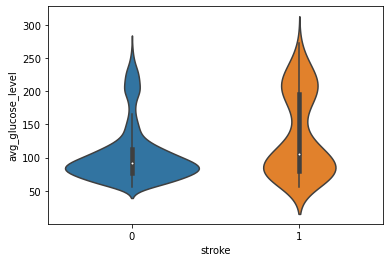

In [12]:
glucose_stroke = sns.violinplot(x = 'stroke', y = 'avg_glucose_level', data = df)

### Feature Engineering

In [13]:
X = df.drop(['stroke'],axis=1)
y = df['stroke']

print(X.shape,y.shape)

(4981, 10) (4981,)


In [14]:
num_col = X.select_dtypes((int,float))
cat_col = X.select_dtypes(object).columns.tolist()

print(num_col)
print(cat_col)

       age  hypertension  heart_disease  avg_glucose_level   bmi
0     67.0             0              1             228.69  36.6
1     80.0             0              1             105.92  32.5
2     49.0             0              0             171.23  34.4
3     79.0             1              0             174.12  24.0
4     81.0             0              0             186.21  29.0
...    ...           ...            ...                ...   ...
4976  41.0             0              0              70.15  29.8
4977  40.0             0              0             191.15  31.1
4978  45.0             1              0              95.02  31.8
4979  40.0             0              0              83.94  30.0
4980  80.0             1              0              83.75  29.1

[4981 rows x 5 columns]
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


#### Applying encoding to all the categorical variables

In [15]:
X_t = pd.get_dummies(X, columns = cat_col, drop_first = True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.3, random_state=42)

In [17]:
# Scaling train and test data

scaling = StandardScaler()
X_train_scale = scaling.fit_transform(X_train)
X_test_scale = scaling.transform(X_test)

### Logistic Regression

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scale,y_train)

LogisticRegression()

In [19]:
log_pred = log_reg.predict(X_test_scale)

In [20]:
log_reg.score(X_train_scale,y_train)

0.9512335054503729

In [21]:
log_reg.score(X_test_scale,y_test)

0.9478260869565217

In [22]:
accuracy_score(y_test,log_pred)

0.9478260869565217

### Decision Tree

In [23]:
tree_param = {'criterion' : ['gini', 'entropy', 'log_loss'], 'splitter' : ['best', 'random'], 'max_features' : ['sqrt', 'log2']}
dec_tree = DecisionTreeClassifier()

In [24]:
tree_grid = GridSearchCV(dec_tree,tree_param)

In [25]:
tree_grid.fit(X_train_scale,y_train)

E:\Ana_conda\envs\test\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Ana_conda\envs\test\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Ana_conda\envs\test\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "E:\Ana_conda\envs\test\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, F

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [26]:
tree_pred = tree_grid.predict(X_test_scale)

In [27]:
accuracy_score(y_test,tree_pred)

0.9244147157190635

#### Best set of Decision Tree Parameters for this Dataset 

In [28]:
print(f'Best set of parameters for Decision tree model is : {tree_grid.best_params_}')
print(f'Best score for Decision tree model is : {tree_grid.best_score_}')
print(f'Best estimators are : {tree_grid.best_estimator_}')

Best set of parameters for Decision tree model is : {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}
Best score for Decision tree model is : 0.9176696690277201
Best estimators are : DecisionTreeClassifier(max_features='sqrt')


Text(0.5, 1.0, 'Difference between the predicted and actual value')

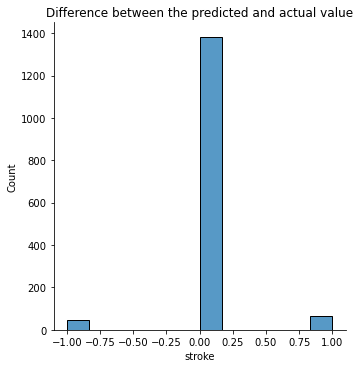

In [29]:
sns.displot(y_test-tree_pred)
plt.title('Difference between the predicted and actual value')

### Random Forest

In [30]:
forest_param = {'n_estimators' : [30,60,100,150], 'criterion':['gini', 'entropy', 'log_loss'], 'max_features':['sqrt', 'log2', None],'max_depth' : [10,15,20,25]}
ran_forest = RandomForestClassifier()

In [31]:
forest_grid = GridSearchCV(estimator = ran_forest, param_grid = forest_param, cv = 4, n_jobs = -1)

In [32]:
forest_grid.fit(X_train_scale,y_train)

E:\Ana_conda\envs\test\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
192 fits failed out of a total of 576.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
192 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Ana_conda\envs\test\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Ana_conda\envs\test\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "E:\Ana_conda\envs\test\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\Ana_conda\envs\test\lib\site-packages\joblib\pa

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [30, 60, 100, 150]})

In [33]:
forest_pred = forest_grid.predict(X_test_scale)

In [34]:
accuracy_score(y_test,forest_pred)

0.9471571906354515

#### Best set of Random forest Parameters for this Dataset 

In [35]:
print(f'Best set of parameters for RF model is : {forest_grid.best_params_}')
print(f'Best score for RF model is : {forest_grid.best_score_}')
print(f'Best estimators are : {forest_grid.best_estimator_}')

Best set of parameters for RF model is : {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 60}
Best score for RF model is : 0.9512338185571789
Best estimators are : RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=60)


In [36]:
forest_report = classification_report(y_test,forest_pred)

In [37]:
print(forest_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495



In [38]:
ma = confusion_matrix(y_test,forest_pred)
print(ma)

[[1416    1]
 [  78    0]]


<AxesSubplot:>

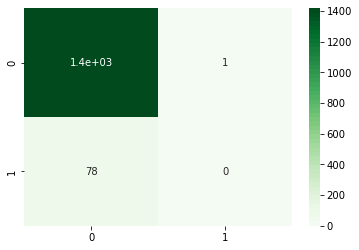

In [39]:
sns.heatmap(ma, annot = True, cmap = sns.color_palette("Greens", 50))

Text(0.5, 1.0, 'Difference between the predicted and actual value')

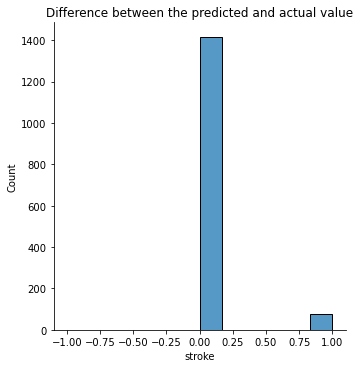

In [40]:
sns.displot(y_test-forest_pred)
plt.title('Difference between the predicted and actual value')

### From the above analysis the accuracy level of predicting a stroke through of Logistic Regression, Decision Tree Classifier and Random Forest Classifier models are acquired